<a href="https://colab.research.google.com/github/masandhu13/predicting-crime-classification/blob/master/Communities_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description
---

In [0]:
#Import important functions

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
pd.__version__

'0.22.0'

In [0]:
#Loading the Communities and crime dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
dataset = pd.read_csv(url, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [0]:
#What is the total number of attributes in the travel reviews dataset?
print(dataset.shape)


# How many sample observations does the dataset contain for each attribute?
dataset.describe()


(1994, 128)


,0,4,5,6,7,8,9,10,11,12,...,96,97,98,99,100,118,119,120,125,127
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 


---


###Part 2
How many different types of attributes do each of the datasets contain?

The number of attributes is 128.

---

### Part 3
How many sample observations do each of the datasets contain for each attribute? 

For each attribute, there are 1994 sample observations.




In [0]:
#What is the mean, max, min value and standard deviation of the average user feedback for each of the attribute categories?
dataset_measures = pd.DataFrame(dataset.describe())
dataset_measures = dataset_measures.T
dataset_measures = dataset_measures[['mean','min', 'max', 'std']]
dataset_measures

,mean,min,max,std
0,28.683551,1.0,56.0,16.397553
4,5.493982,1.0,10.0,2.873694
5,0.057593,0.0,1.0,0.126906
6,0.463395,0.0,1.0,0.163717
7,0.179629,0.0,1.0,0.253442
8,0.753716,0.0,1.0,0.244039
9,0.153681,0.0,1.0,0.208877
10,0.144022,0.0,1.0,0.232492
11,0.424218,0.0,1.0,0.155196
12,0.493867,0.0,1.0,0.143564


# Data Processing 

### Display the values of the attributes in a dataframe format:
### The name of township attribute from the communities and crime dataset.

In [0]:
df_township = pd.DataFrame(dataset, columns = [3])
df_township

,3
0,Lakewoodcity
1,Tukwilacity
2,Aberdeentown
3,Willingborotownship
4,Bethlehemtownship
5,SouthPasadenacity
6,Lincolntown
7,Selmacity
8,Hendersoncity
9,Claytoncity


In [0]:
#Does the dataset have any special characters as values? If it does then replace them with NaN and drop the values.
dataset = dataset.replace('?', np.nan)
dataset = dataset.dropna(how="any")
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
16,36,1,1000,Albanycity,1,0.15,0.31,0.40,0.63,0.14,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
23,19,193,93926,SiouxCitycity,1,0.11,0.43,0.04,0.89,0.09,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63
33,51,680,47672,Lynchburgcity,1,0.09,0.43,0.51,0.58,0.04,...,0.14,0.11,0.19,0.05,0.01,0.75,0,0.60,0.1,0.31
68,34,23,58200,PerthAmboycity,1,0.05,0.59,0.23,0.39,0.09,...,0.01,0.73,0.28,0,0.02,0.64,0,1.00,0.23,0.50
74,9,9,46520,Meridentown,1,0.08,0.39,0.08,0.85,0.04,...,0.07,0.21,0.04,0.02,0.01,0.7,1,0.44,0.11,0.14


In [0]:
#Scale the values of the last five category attributes using the sklearn min-max scaling function. Print out these values
# 1. All the numerical attributes of the Communities and Crime dataset.

numeric_data = dataset._get_numeric_data()
minmax_scaled_numeric = preprocessing.MinMaxScaler().fit_transform(numeric_data)
print(minmax_scaled_numeric)



[[0.58695652 0.         0.13265306 ... 0.83505155 0.88       0.47959184]
 [0.2173913  0.         0.09183673 ... 0.04123711 0.56       0.62244898]
 [0.91304348 0.         0.07142857 ... 0.16494845 0.6        0.29591837]
 ...
 [0.         1.         0.05102041 ... 0.1443299  0.62       0.05102041]
 [0.         1.         0.14285714 ... 0.15463918 0.91       0.21428571]
 [0.34782609 1.         0.06122449 ... 0.30927835 0.22       0.17346939]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Data Visualization

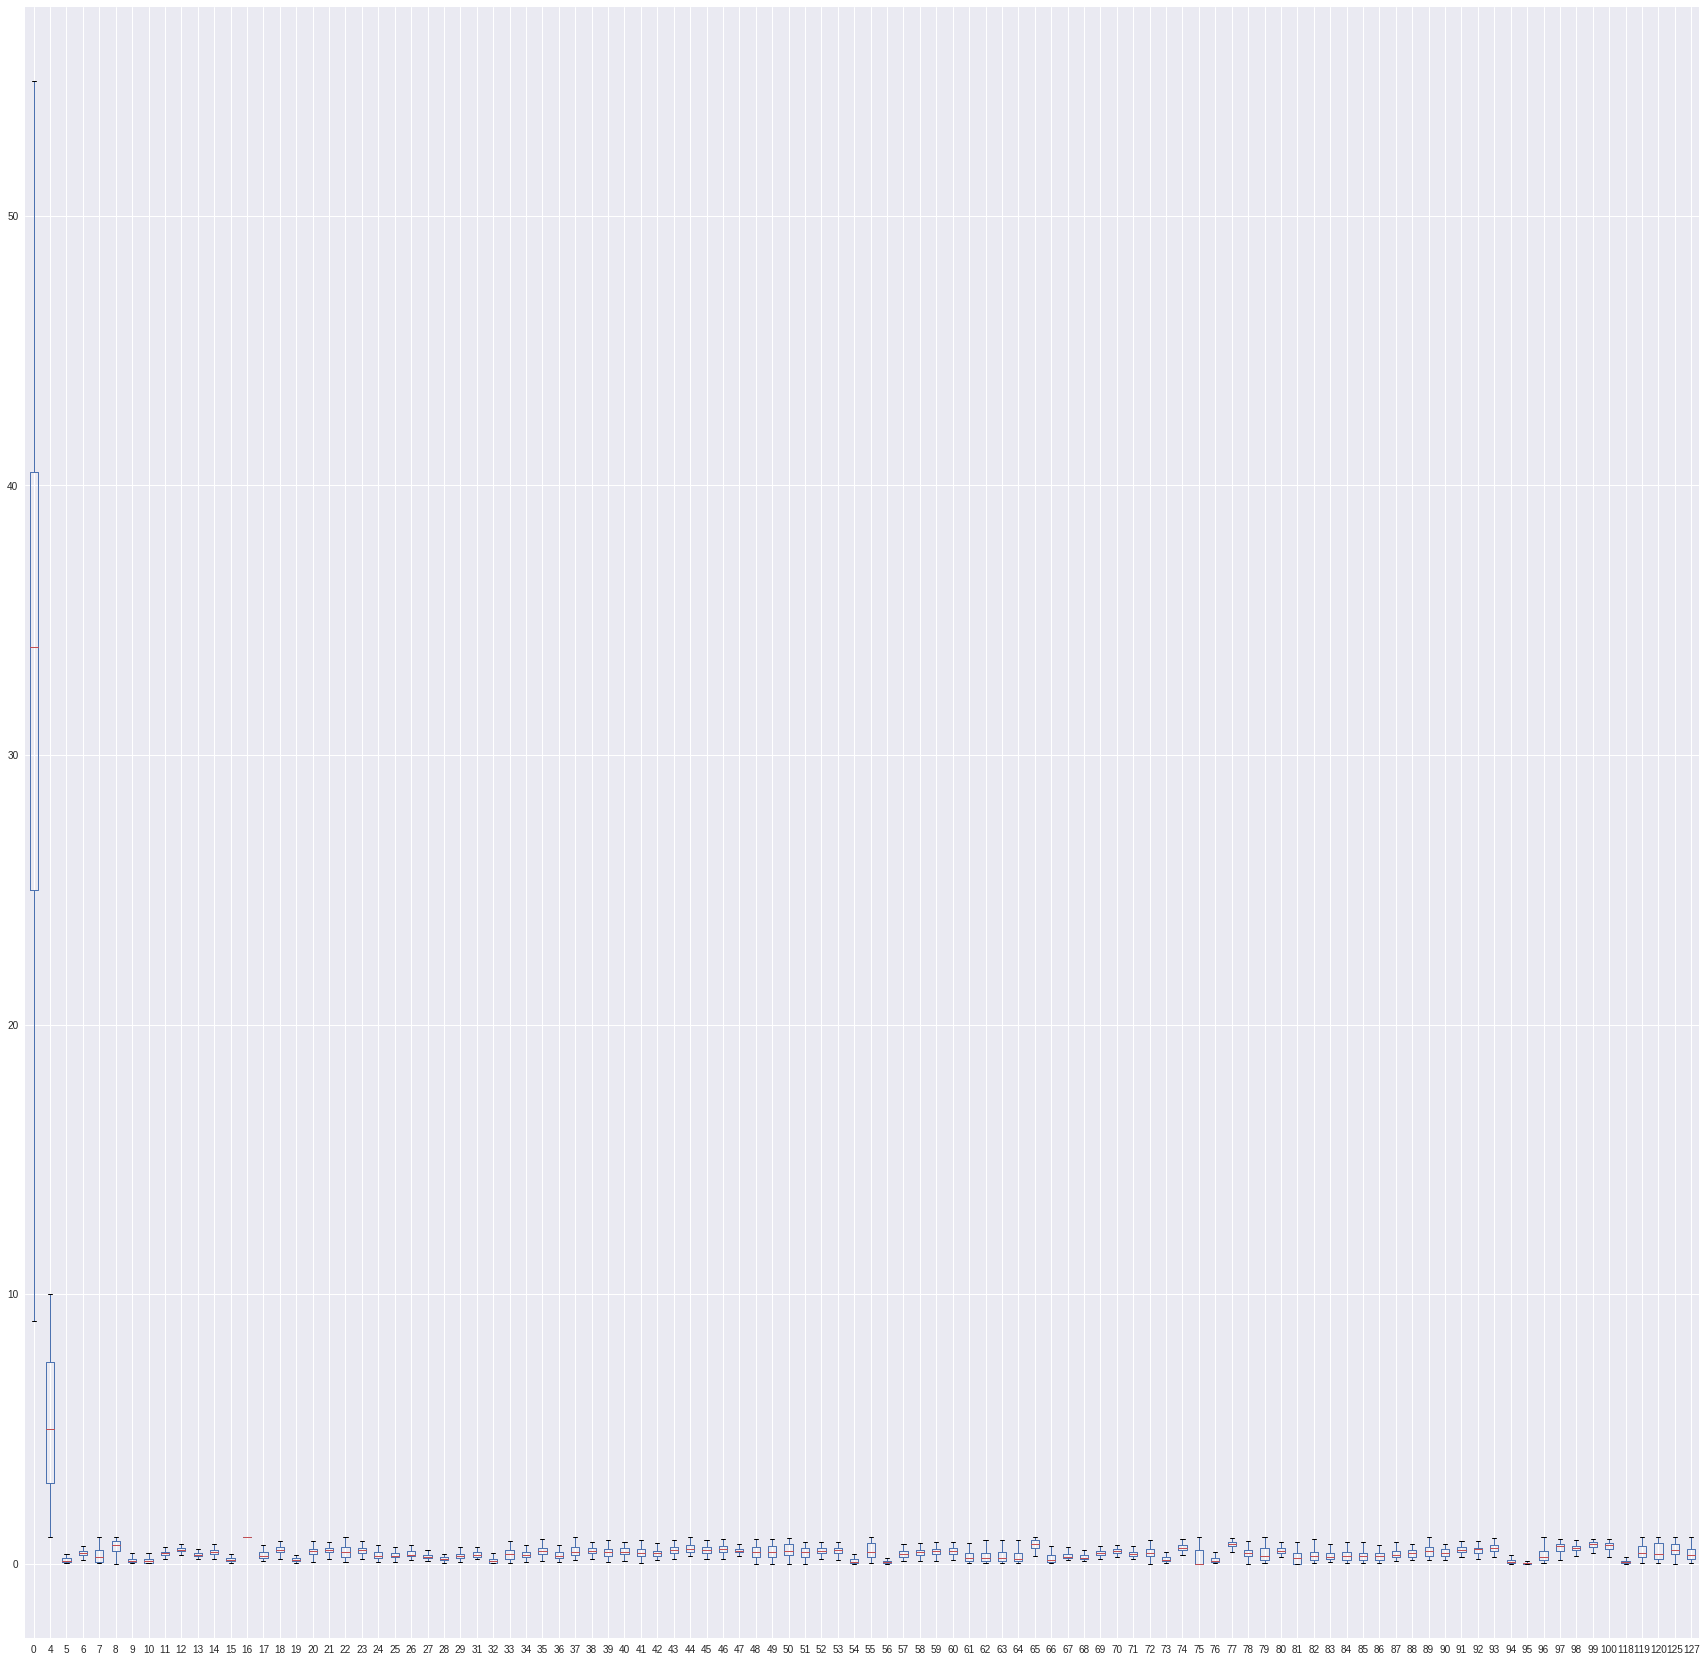

In [0]:
#Plot the raw dataset in the form of a box plot
df2 = numeric_data.copy()
df2.plot.box(figsize = (30, 30))

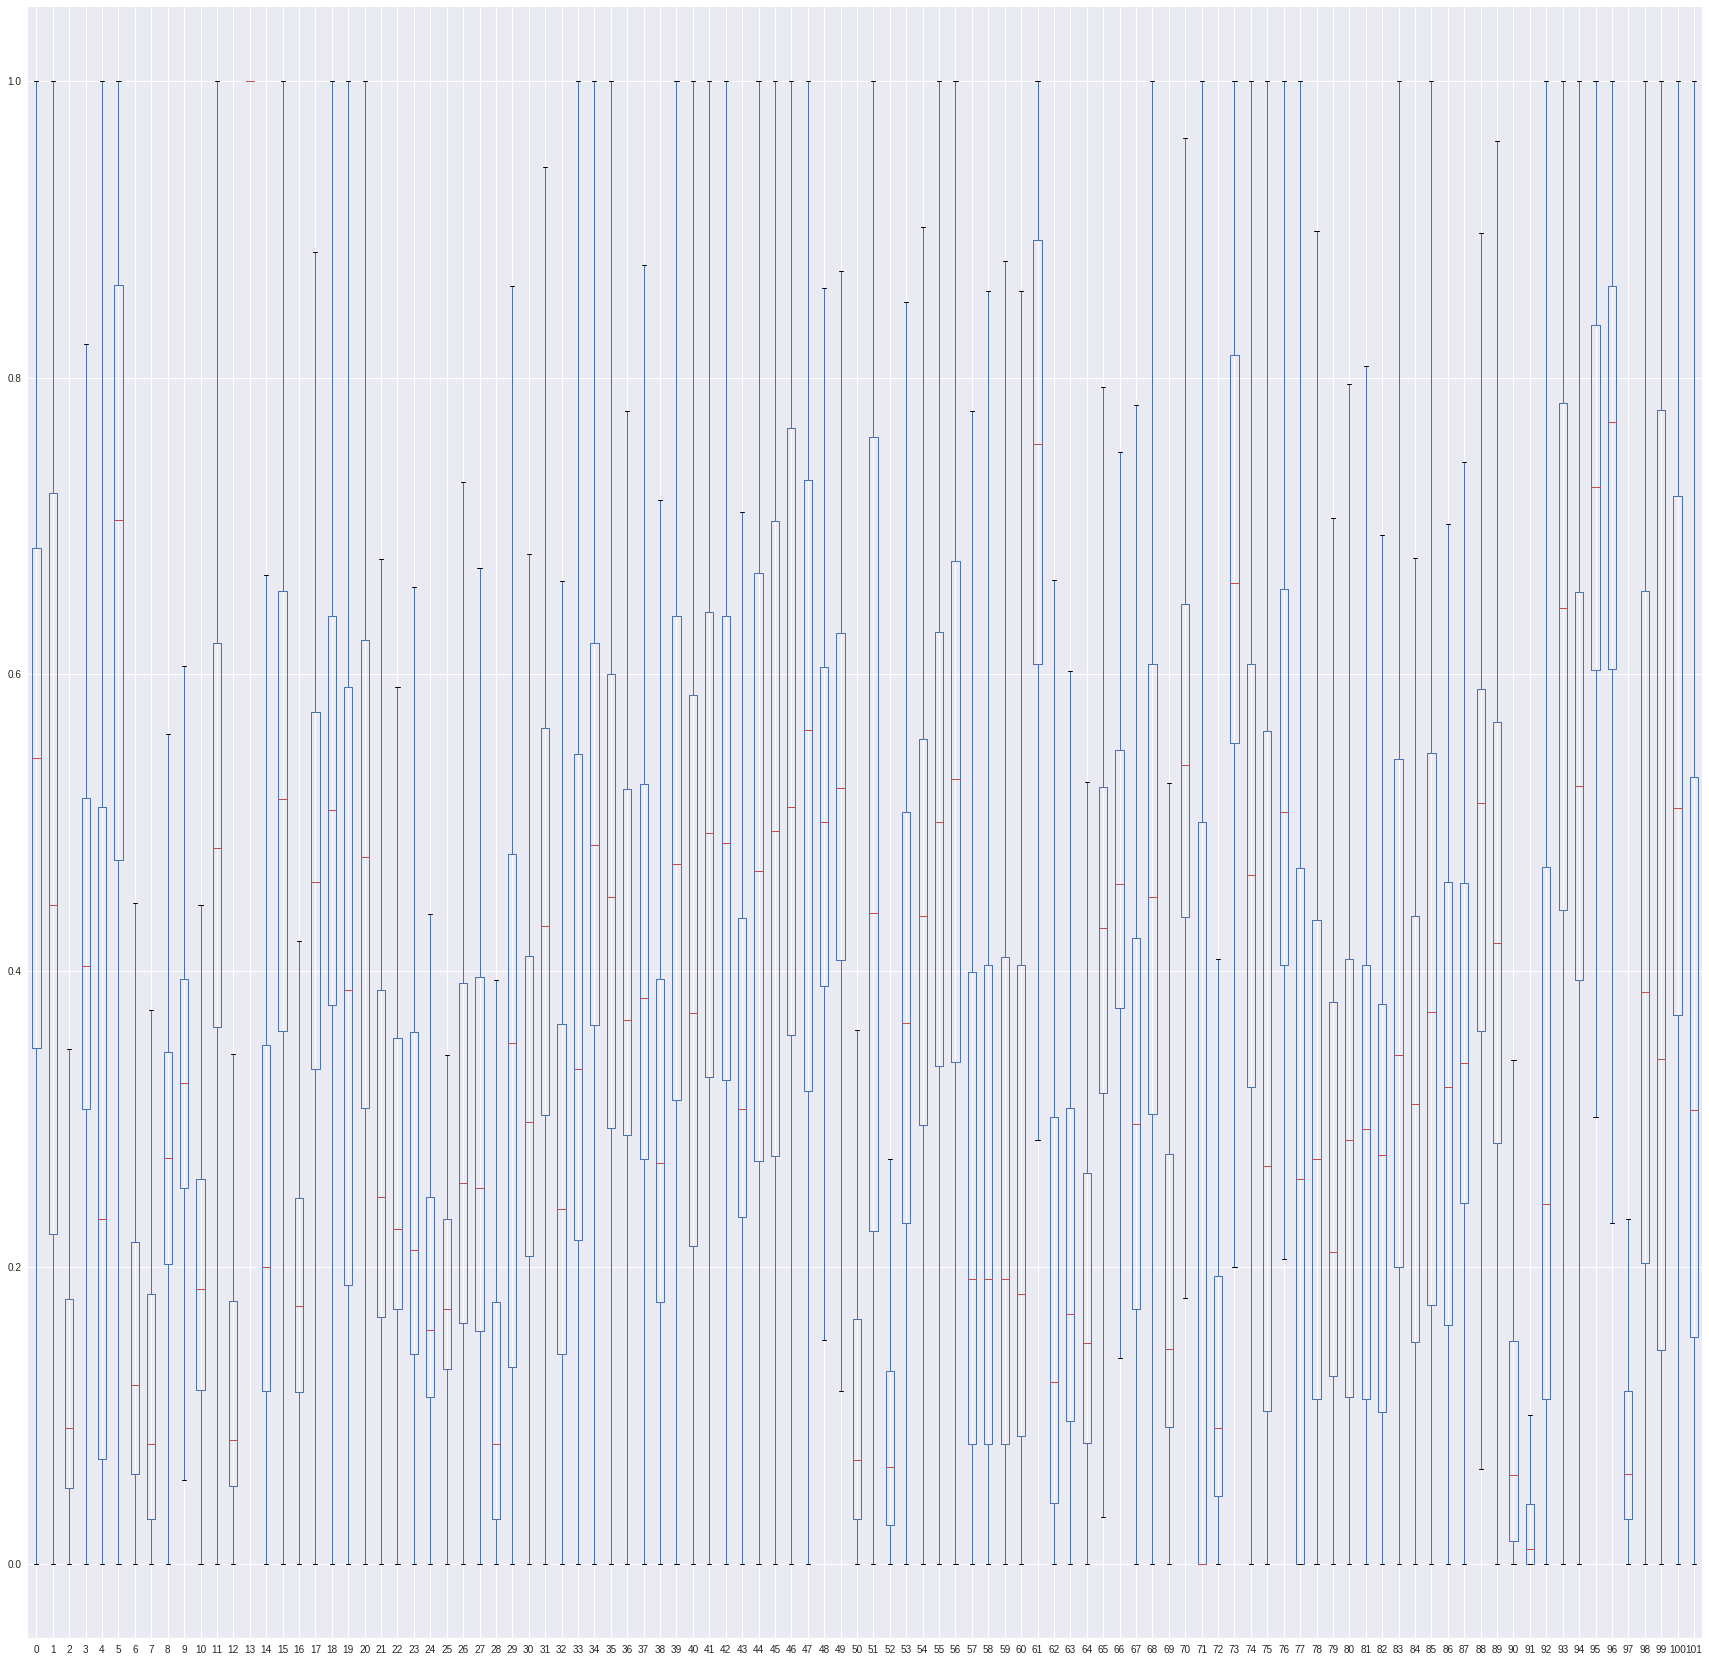

In [0]:
# Plotting the scaled data.
df3 = pd.DataFrame(minmax_scaled_numeric).copy()
df3.plot.box(figsize = (30, 30))

<Figure size 576x396 with 0 Axes>

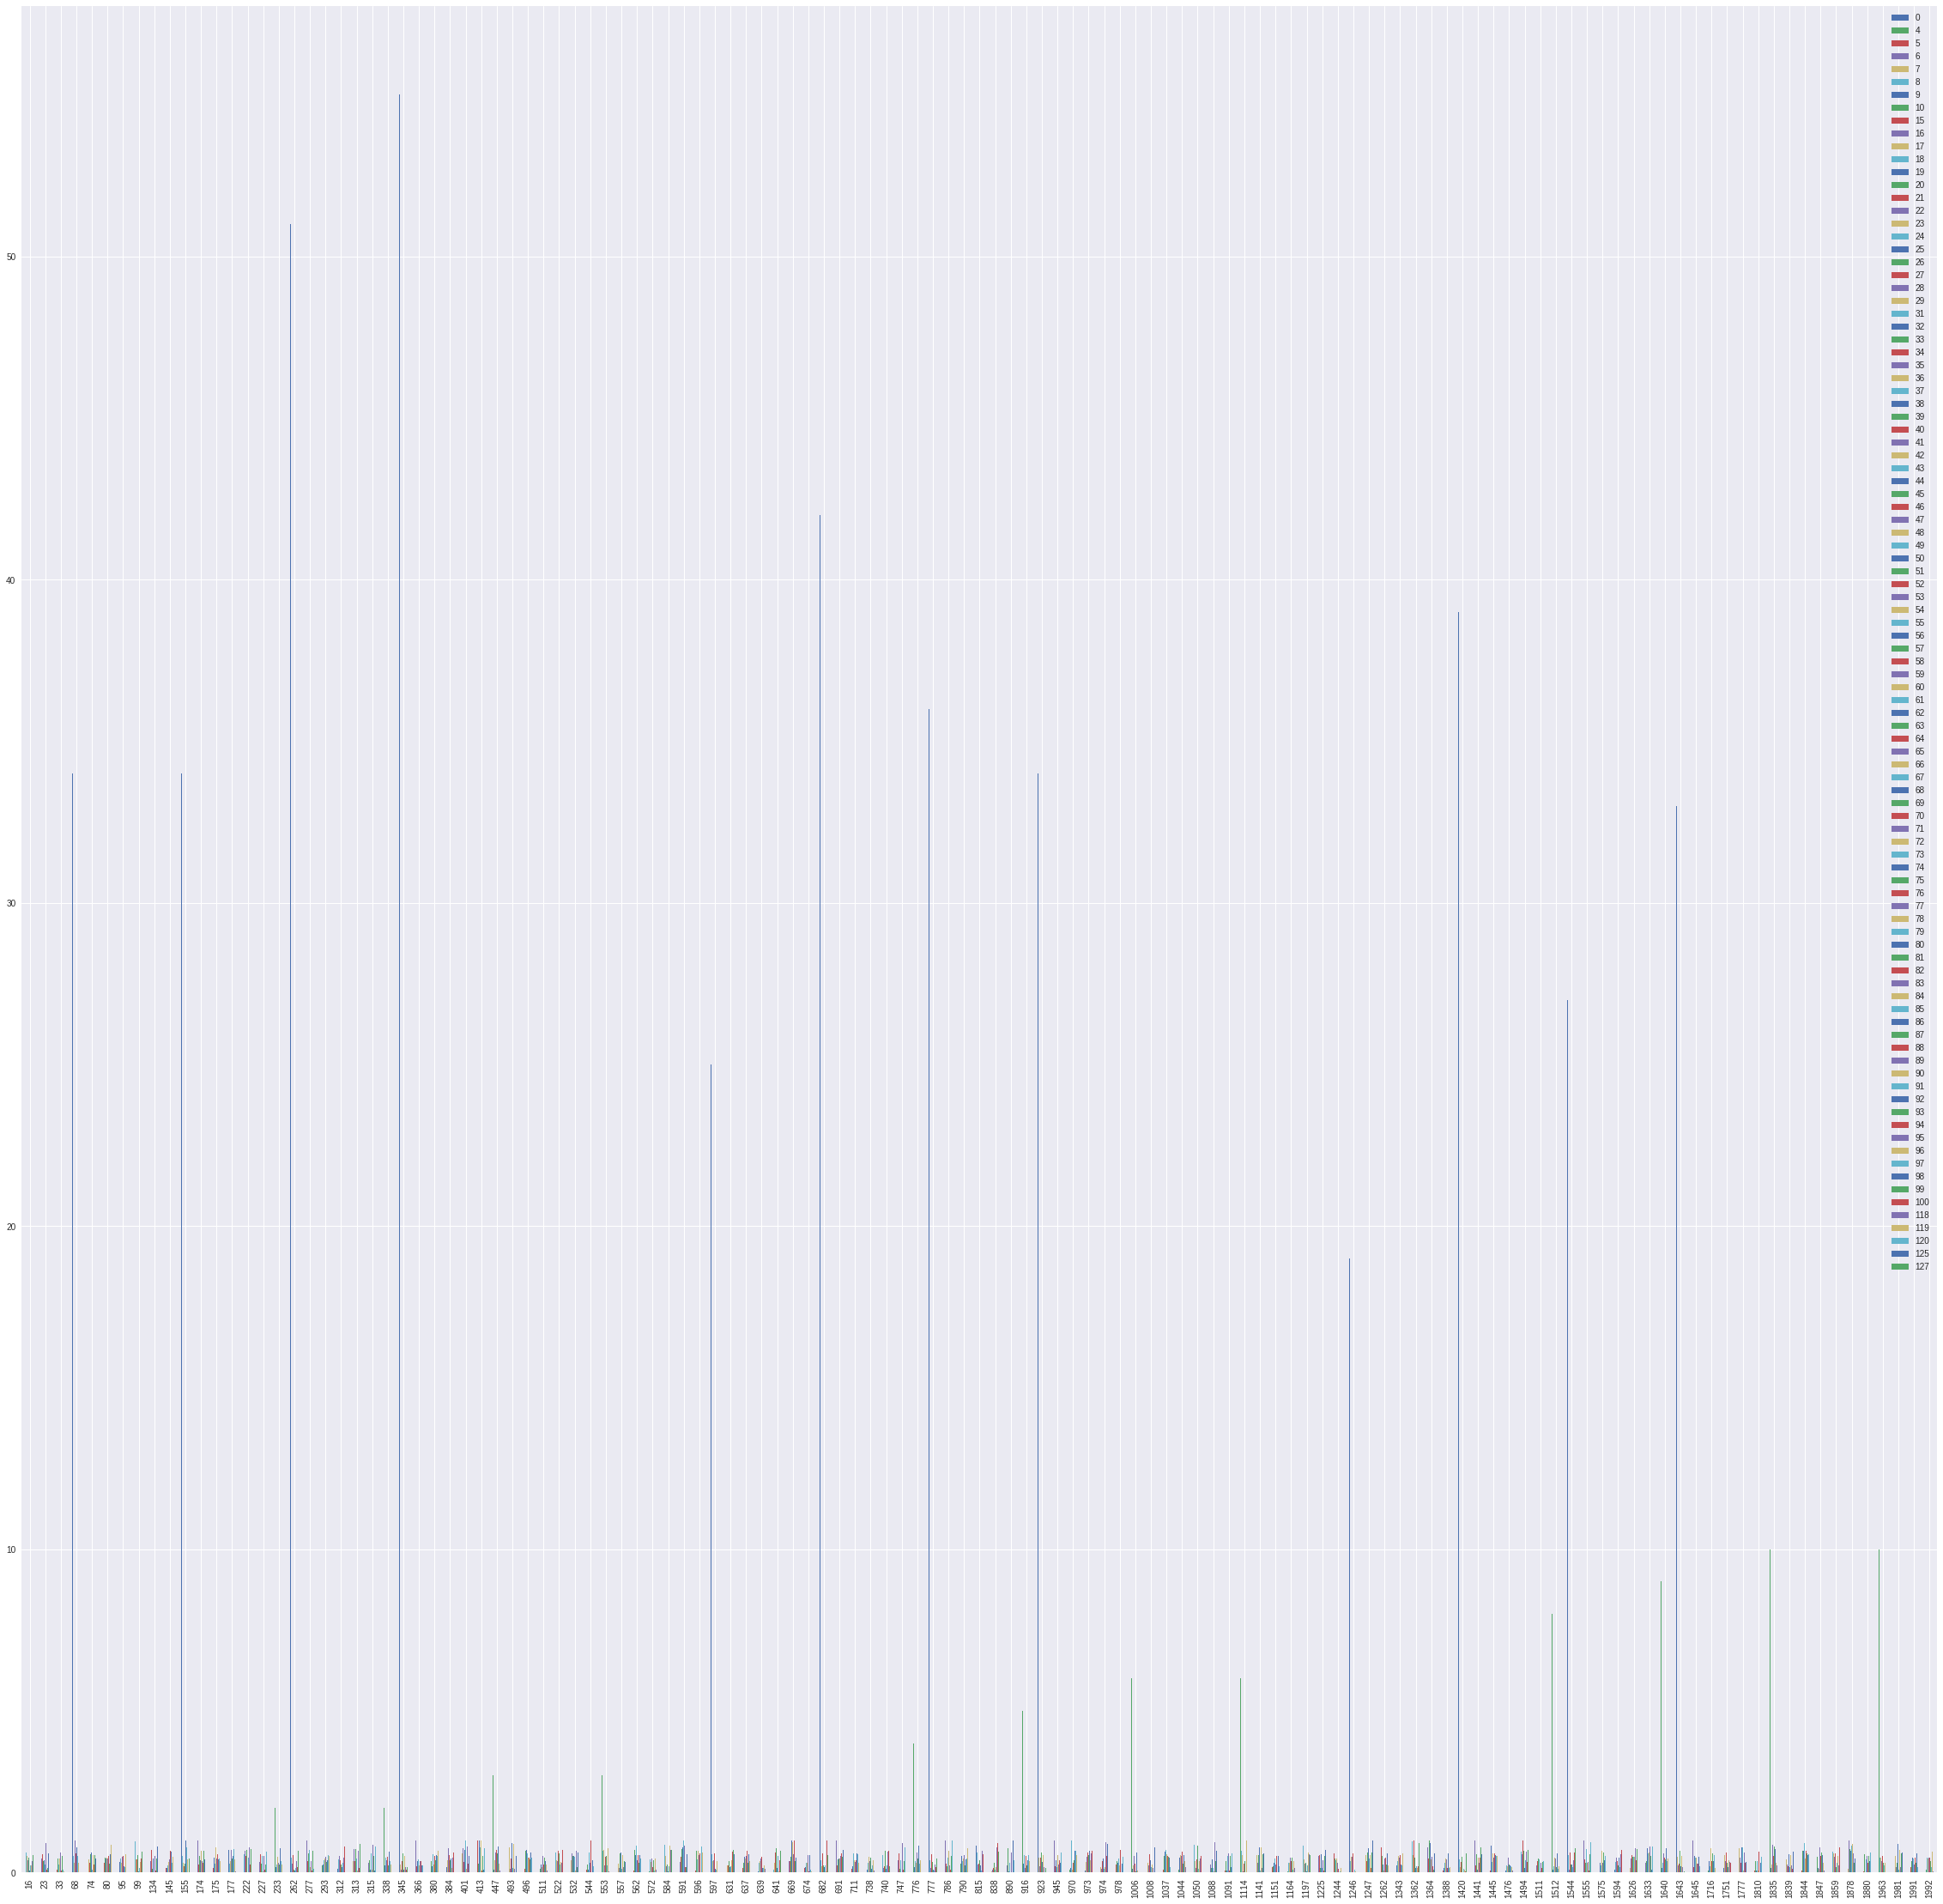

In [0]:
# Group the features and plot the new dataframe: by age of participants in the communities and crime dataset.
df_age = pd.DataFrame(dataset)
df1_age = df_age.groupby([11,12,13,14])
df1_age = df1_age.cumsum()
plt.figure();
df1_age.plot.bar(figsize = (40, 40));

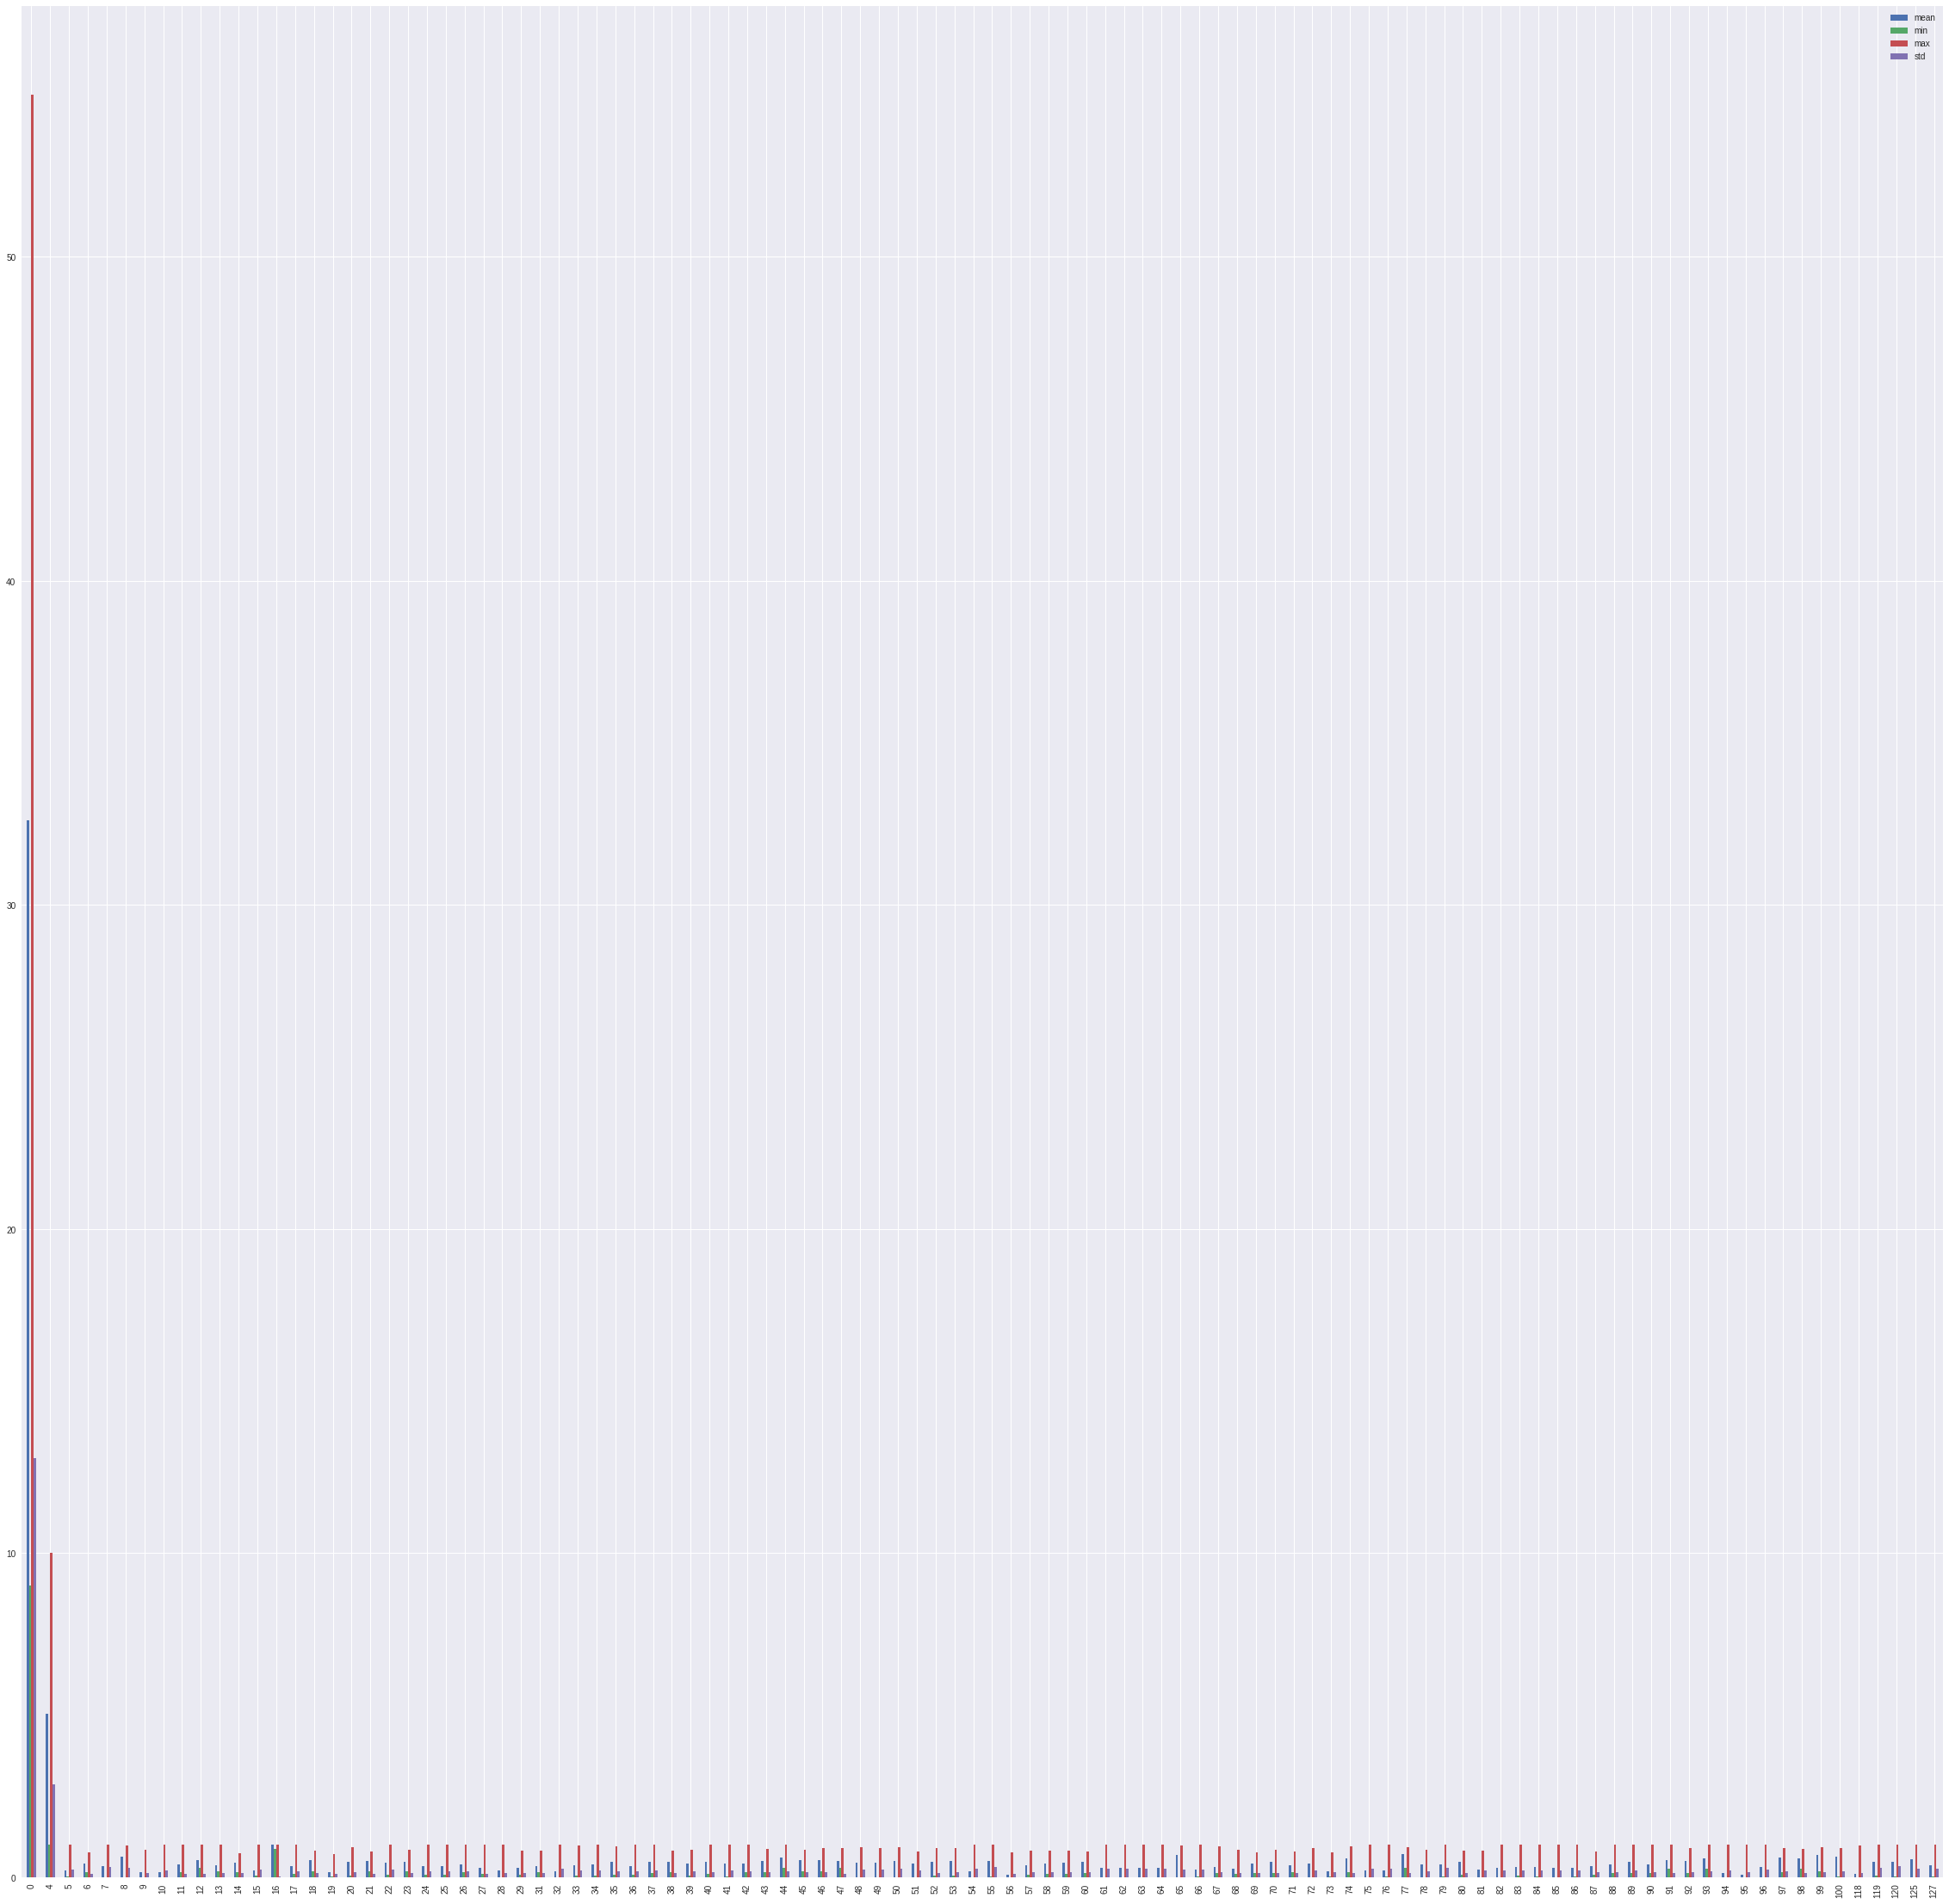

In [0]:
# Plot the mean, minimum, maximum, standard deviation values of each numerical attribute.
dataset_measures = pd.DataFrame(dataset.describe())
dataset_measures = dataset_measures.T
dataset_measures = dataset_measures[['mean','min', 'max', 'std']]
dataset_measures.plot.bar(figsize = (40, 40));

# PCA


In [0]:
numeric_data = dataset._get_numeric_data()

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
principalComponents = pca.fit_transform(numeric_data)
principalDf = pd.DataFrame(data=principalComponents)
principalDf

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-3.444744,-4.009001,0.390079,-0.306418,0.481167,0.700922,0.206718,-0.524796,-0.076928,-0.032001,...,-0.089926,0.024235,-0.035789,0.032794,0.025357,0.083983,0.131438,-0.068865,-0.051314,-0.077001
1,13.541660,-4.206430,-0.218243,-1.093022,-0.422215,0.617802,0.174602,0.473394,0.441821,-0.209175,...,-0.096431,-0.072062,0.079251,-0.055081,-0.029798,-0.014483,-0.019011,0.126209,-0.012673,0.000898
2,-18.450229,-3.861409,-0.354079,-0.518384,-0.000587,0.342538,0.462733,0.080000,0.279130,0.205514,...,0.017014,0.023906,0.020092,-0.112410,0.005879,0.047587,0.000015,-0.101914,-0.071689,0.003305
3,-1.419258,-4.040291,1.045813,1.530791,-1.361726,-0.287120,0.082092,0.472313,-0.089012,0.115510,...,0.039249,-0.055175,0.015815,0.082923,0.157336,-0.041253,-0.073152,-0.020838,-0.189575,-0.055676
4,23.558844,-4.302309,-0.496314,-0.821204,-0.599731,0.261415,0.136834,0.366603,-0.108396,-0.148272,...,-0.047935,0.036056,0.044800,0.069336,0.016240,-0.093995,0.037603,-0.032836,-0.010726,-0.080574
5,-3.409540,-4.032881,-0.006328,0.827987,0.220383,-0.328694,-0.431134,-0.390646,-0.233637,0.002617,...,-0.006141,-0.038344,0.066983,0.025205,-0.091546,0.065805,0.136894,0.056623,-0.033973,-0.028476
6,7.583318,-4.155646,-0.434201,0.446169,0.166928,0.241956,-0.291613,-0.397598,0.201656,-0.478613,...,0.053578,-0.016860,-0.108534,-0.073801,0.058436,-0.005694,-0.045050,-0.056102,-0.019497,0.046752
7,-0.433401,-4.050386,-0.672260,-0.274237,-0.229141,0.471461,0.015821,0.313912,-0.102485,-0.135566,...,-0.031670,-0.009006,-0.081025,0.033872,0.117952,0.107602,0.003558,0.007824,-0.020100,0.014578
8,-1.406270,-4.066096,-1.252014,0.422804,-0.362834,-0.140022,-0.469279,-0.043260,-0.481965,-0.101527,...,0.037383,0.008350,0.001528,-0.034603,-0.047122,-0.019912,0.051018,0.005387,-0.018236,0.055589
9,7.568502,-4.135105,0.578274,0.567544,-0.568791,0.427042,-0.107868,0.441140,0.258386,0.167256,...,0.183878,-0.030561,-0.109043,0.019007,-0.073506,0.077582,-0.053740,0.060008,-0.026141,0.113755


In [0]:
# PCA - Scaled data
# PCA makes sense when you use scaled data as PCA is effected by scale .

numeric_data = dataset._get_numeric_data()
minmax_scaled_numeric = preprocessing.MinMaxScaler().fit_transform(numeric_data)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
principalComponents = pca.fit_transform(minmax_scaled_numeric)
principalDf = pd.DataFrame(data=principalComponents)
principalDf

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.471083,-0.363638,0.760816,0.494073,-0.715114,-0.449855,-0.192441,0.259429,-0.236117,-0.075553,...,0.009683,0.056043,0.014279,0.089640,0.050016,0.205197,-0.022200,0.080325,-0.065198,-0.020063
1,-0.334264,-0.908947,-0.152114,0.635397,0.081042,0.316122,-0.601859,0.393568,0.589812,-0.464986,...,-0.012497,0.082153,0.067265,-0.005527,-0.038157,-0.126293,-0.044333,0.029640,0.014655,0.050448
2,-0.003288,-1.009788,0.199104,0.767108,0.129052,-0.058420,-0.612260,0.540889,0.252304,0.292473,...,-0.072585,-0.073495,0.050112,0.105086,-0.018732,0.064947,0.123266,-0.035336,-0.065608,0.025325
3,1.081851,1.493727,-1.740888,0.079301,0.293968,0.267376,-0.302121,-0.059116,0.138382,-0.117259,...,0.160125,0.093879,-0.083307,0.033874,0.097076,0.057876,0.032475,-0.113306,-0.135635,0.222525
4,-0.844760,-0.509013,-0.525866,0.103049,-0.014352,0.073400,-0.244912,-0.414164,0.282752,-0.530953,...,0.022023,0.103644,0.002787,0.025302,-0.037929,0.031737,-0.025945,-0.129119,-0.040777,-0.027693
5,-0.128341,0.731202,-0.148383,-0.643703,-0.593812,0.248885,-0.248200,0.045954,-0.335786,0.224235,...,-0.027941,0.063268,0.087283,-0.078529,-0.133687,0.127056,0.039329,0.101866,0.065117,0.096197
6,-0.680487,0.590255,0.073414,-0.017586,-0.737330,0.140275,-0.464897,0.431611,-0.221514,-0.259451,...,0.012056,-0.169907,0.054993,-0.011560,0.098356,0.016014,0.094636,-0.053765,0.003320,0.051162
7,-0.678666,-0.365022,-0.114178,0.605983,-0.071427,0.161616,-0.260261,-0.309369,0.022392,-0.340486,...,0.122095,-0.007712,-0.014284,0.111020,0.156616,0.065299,0.051655,-0.004092,0.102256,0.024254
8,-1.497129,0.123838,-0.654216,-0.274886,-0.613879,0.417708,-0.309308,-0.214443,-0.262193,-0.035343,...,-0.063760,-0.064612,0.024816,-0.073445,-0.024553,0.023314,-0.054976,0.053363,-0.074941,-0.029967
9,0.565615,0.787357,-0.587640,0.518414,-0.094563,0.446740,-0.194181,0.306496,0.551976,-0.270251,...,0.117239,-0.170335,-0.155469,-0.141994,0.026065,-0.037071,0.044609,0.169167,0.055490,0.062676


# Logistic Regression

In [0]:
# Get standardized, scale + normalized numeric data.
# The missing values have already been removed
numeric_data = dataset._get_numeric_data()
minmax_scaled_numeric = preprocessing.MinMaxScaler().fit_transform(numeric_data)
minmax_scaled_numeric = pd.DataFrame(minmax_scaled_numeric)


# Split Data into Training and Test Sets
from sklearn.model_selection import train_test_split

# I will be trying to predict the last column - total number of violent crimes per 100K popuation.
# This is the "GOAL attribute (to be predicted)" as per http://archive.ics.uci.edu/ml/datasets/communities+and+crime.
# Since logistic regression requires binary labels, I will split it into labels of 0 and 1.
# Moreover, I will choose the mean of the "scaled" value of the last column for the splitting up - to make it hard for the model.

feature_columns = list(range(0,101))
features_data = pd.DataFrame(minmax_scaled_numeric, columns = feature_columns) 
labels = pd.DataFrame(minmax_scaled_numeric, columns = [101]) 

import numpy as np
mean_label = np.mean(labels)
labels = (labels > mean_label)

train_data, test_data, train_labels, test_labels = train_test_split(features_data, labels, test_size=0.15, random_state=0)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
# Standardize the Data - this has been done before, but differently. 
# Trying this method out - it won't change the data if the data has been scaled 
# before properly.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Import and Apply PCA
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)
pca.fit(train_data)


# Apply the mapping (transform) to both the training set and the test set.
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)


In [0]:
# Apply Logistic Regression to the Transformed Data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_data, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
logisticRegr.score(test_data, test_labels)

0.8421052631578947

### The model has 84.2% accuracy based on our setup.